In [1]:
import pandas as pa
import numpy as nu
import seaborn as se
import matplotlib.pyplot as py

In [2]:
data=pa.read_csv(r'/Users/puneetpalpowar/Desktop/Project-1 Hotel Booking Cancellation Predicotor/hotel_bookings.csv')

In [3]:
type(data)

pandas.core.frame.DataFrame

In [4]:
#Finding all possible missing values
data.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [5]:
# Get rid of the "agent" and "company" columns, since there is too much missing data
data.drop(['agent', 'company'],axis=1,inplace=True)

In [6]:
# Fill in the missing values of "country" with the mode country in the dataset
data['country'].fillna(data['country'].value_counts().index[0],inplace=True)

In [7]:
# Fill in "children" column missing data with 0
data.fillna(0, inplace=True)

In [8]:
# Checking that the data cleaning has occurred properly
data.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [9]:
# Getting rid of any impossible bookings
filter1=((data['children']==0) & (data['adults']==0) & (data['babies']==0))
new_data=data[-filter1]

In [10]:
new_data['is_canceled'].unique()

array([0, 1])

In [11]:
new_data[new_data['is_canceled']==0]['country'].value_counts()/75011

PRT    0.285265
GBR    0.128888
FRA    0.112890
ESP    0.085094
DEU    0.080881
         ...   
BHR    0.000013
DJI    0.000013
MLI    0.000013
NPL    0.000013
FRO    0.000013
Name: country, Length: 165, dtype: float64

In [12]:
len(new_data[new_data['is_canceled']==0])

75011

In [13]:
country_data=new_data[new_data['is_canceled']==0]['country'].value_counts().reset_index()
country_data.columns=['country', 'no_of_guests']
country_data

country  no_of_guests
0       PRT         21398
1       GBR          9668
2       FRA          8468
3       ESP          6383
4       DEU          6067
..      ...           ...
160     BHR             1
161     DJI             1
162     MLI             1
163     NPL             1
164     FRO             1

[165 rows x 2 columns]

In [14]:
##!pip install plotly

In [15]:
##!pip install chart_studio

In [16]:
import plotly
import chart_studio.plotly as pt
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)

In [17]:
import plotly.express as px

In [18]:
map=px.choropleth(country_data,locations=country_data['country'],color=country_data['no_of_guests'],hover_name=country_data['country'],title='Home Countries of Guests')

In [19]:
map.show()

In [20]:
new_data2=new_data[new_data['is_canceled']==0]

Text(0, 0.5, 'price(EUR)')

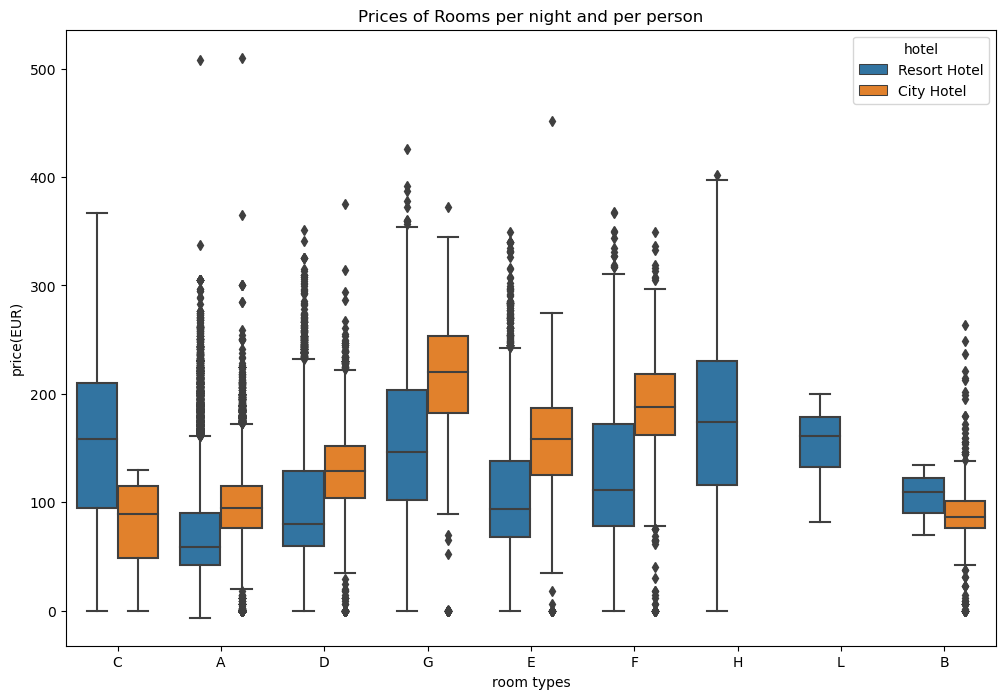

In [21]:
py.figure(figsize=(12,8))
se.boxplot(x='reserved_room_type',y='adr',hue='hotel',data=new_data2)
py.title('Prices of Rooms per night and per person')
py.xlabel('room types')
py.ylabel('price(EUR)')

In [22]:
new_data['hotel'].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

In [23]:
resort=new_data[(new_data['hotel']=='Resort Hotel') & (new_data['is_canceled']==0)]
city=new_data[(new_data['hotel']=='City Hotel') & (new_data['is_canceled']==0)]

In [24]:
new_resort_data=resort['arrival_date_month'].value_counts().reset_index()
new_resort_data.columns=['month','no_of_guests']
new_resort_data

month  no_of_guests
0      August          3257
1        July          3137
2     October          2575
3       March          2571
4       April          2550
5         May          2535
6    February          2308
7   September          2102
8        June          2037
9    December          2014
10   November          1975
11    January          1866

In [25]:
new_city_data=city['arrival_date_month'].value_counts().reset_index()
new_city_data.columns=['month','no_of_guests']
new_city_data

month  no_of_guests
0      August          5367
1        July          4770
2         May          4568
3        June          4358
4     October          4326
5   September          4283
6       March          4049
7       April          4010
8    February          3051
9    November          2676
10   December          2377
11    January          2249

In [26]:
final_hotel_data=new_resort_data.merge(new_city_data,on='month')

In [27]:
final_hotel_data.columns=['months','no_of_guests_in_resort','no_of_guests_city']

In [28]:
##!pip install sorted-months-weekdays
##!pip install sort_dataframeby_monthorweek
import sort_dataframeby_monthorweek as sd
final_hotel_data=sd.Sort_Dataframeby_Month(final_hotel_data,'months')

In [29]:
px.line(data_frame=final_hotel_data,x='months',y=['no_of_guests_in_resort','no_of_guests_city'])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'January'),
  Text(1, 0, 'February'),
  Text(2, 0, 'March'),
  Text(3, 0, 'April'),
  Text(4, 0, 'May'),
  Text(5, 0, 'June'),
  Text(6, 0, 'July'),
  Text(7, 0, 'August'),
  Text(8, 0, 'September'),
  Text(9, 0, 'October'),
  Text(10, 0, 'November'),
  Text(11, 0, 'December')])

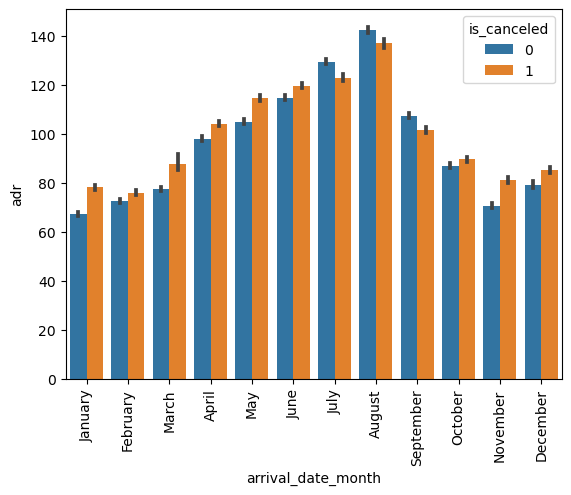

In [30]:
new_data=sd.Sort_Dataframeby_Month(new_data,'arrival_date_month')
se.barplot(x='arrival_date_month',y='adr',data=new_data,hue='is_canceled')
py.xticks(rotation='vertical')

(0.0, 800.0)

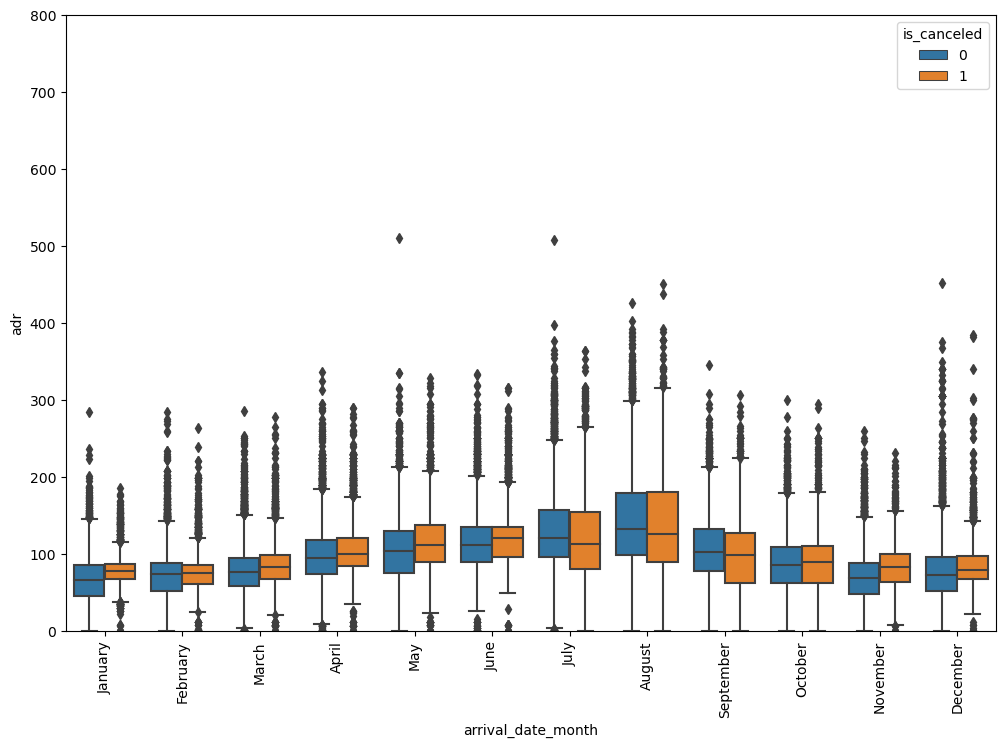

In [31]:
py.figure(figsize=(12,8))
new_data=sd.Sort_Dataframeby_Month(new_data,'arrival_date_month')
se.boxplot(x='arrival_date_month',y='adr',data=new_data,hue='is_canceled')
py.xticks(rotation='vertical')
py.ylim(0,800)

In [32]:
pa.crosstab(index=new_data['stays_in_weekend_nights'],columns=new_data['stays_in_week_nights'])

stays_in_week_nights       0      1      2      3     4     5    6    7    8   \
stays_in_weekend_nights                                                         
0                         645  16436  17949  11557  4478   830    0    0    0   
1                        4569   7325   8976   6150  2407  1188    0    0    0   
2                        2358   6531   6745   4534  2658  8648  847  446  391   
3                           0      0      0      0     0   308  300  397  131   
4                           0      0      0      0     0    94  347  181  132   
5                           0      0      0      0     0     0    0    0    0   
6                           0      0      0      0     0     0    0    0    0   
7                           0      0      0      0     0     0    0    0    0   
8                           0      0      0      0     0     0    0    0    0   
9                           0      0      0      0     0     0    0    0    0   
10                          0      0      0      0     0     0    0    0    0   
12                          0      0      0      0     0     0    0    0    0   
13                          0      0      0      0     0     0    0    0    0   
14                          0      0      0      0     0     0    0    0    0   
16                          0      0      0      0     0     0    0    0    0   
18                          0      0      0      0     0     0    0    0    0   
19                          0      0      0      0     0     0    0    0    0   

stays_in_week_nights     9   ...  24  25  26  30  32  33  34  40  42  50  
stays_in_weekend_nights      ...                                          
0                         0  ...   0   0   0   0   0   0   0   0   0   0  
1                         0  ...   0   0   0   0   0   0   0   0   0   0  
2                        81  ...   0   0   0   0   0   0   0   0   0   0  
3                        61  ...   0   0   0   0   0   0   0   0   0   0  
4                        86  ...   0   0   0   0   0   0   0   0   0   0  
5                         0  ...   0   0   0   0   0   0   0   0   0   0  
6                         0  ...   0   0   0   0   0   0   0   0   0   0  
7                         0  ...   0   0   0   0   0   0   0   0   0   0  
8                         0  ...   0   0   0   0   0   0   0   0   0   0  
9                         0  ...   3   1   0   0   0   0   0   0   0   0  
10                        0  ...   0   5   0   0   0   0   0   0   0   0  
12                        0  ...   0   0   1   4   0   0   0   0   0   0  
13                        0  ...   0   0   0   0   1   1   0   0   0   0  
14                        0  ...   0   0   0   0   0   0   1   0   0   0  
16                        0  ...   0   0   0   0   0   0   0   2   0   0  
18                        0  ...   0   0   0   0   0   0   0   0   1   0  
19                        0  ...   0   0   0   0   0   0   0   0   0   1  

[17 rows x 33 columns]

In [33]:
def week_function(row):
    feature1='stays_in_weekend_nights'
    feature2='stays_in_week_nights'
    
    if row[feature2]==0 and row[feature1]>0:
        return 'stay_just_weekend'
    elif row[feature1]==0 and row[feature2]>0:
        return 'stay_just_weekdays'
    elif row[feature1]>0 and row[feature2]>0:
        return 'stay_both_weekdays_weekends'
    else:
        return 'undefined_data'

In [34]:
new_data2['weekend_or_weekday']=new_data2.apply(week_function,axis=1)

In [35]:
new_data2['weekend_or_weekday'].value_counts()

stay_both_weekdays_weekends    37551
stay_just_weekdays             31788
stay_just_weekend               5050
undefined_data                   622
Name: weekend_or_weekday, dtype: int64

In [36]:
new_data2=sd.Sort_Dataframeby_Month(new_data2,'arrival_date_month')
new_data2.groupby(['arrival_date_month','weekend_or_weekday']).size()

arrival_date_month  weekend_or_weekday         
April               stay_both_weekdays_weekends    3627
                    stay_just_weekdays             2559
                    stay_just_weekend               344
                    undefined_data                   30
August              stay_both_weekdays_weekends    4929
                    stay_just_weekdays             3137
                    stay_just_weekend               509
                    undefined_data                   49
December            stay_both_weekdays_weekends    1901
                    stay_just_weekdays             2123
                    stay_just_weekend               298
                    undefined_data                   69
February            stay_both_weekdays_weekends    2438
                    stay_just_weekdays             2514
                    stay_just_weekend               360
                    undefined_data                   47
January             stay_both_weekdays_weekends    1550


In [37]:
grouped_data=new_data2.groupby(['arrival_date_month','weekend_or_weekday']).size().unstack().reset_index()

In [38]:
sorted_data=sd.Sort_Dataframeby_Month(grouped_data,'arrival_date_month')

In [39]:
sorted_data.set_index('arrival_date_month',inplace=True)

In [40]:
sorted_data

stay_both_weekdays_weekends  stay_just_weekdays  \
arrival_date_month                                                    
January                                    1550                2125   
February                                   2438                2514   
March                                      3151                3060   
April                                      3627                2559   
May                                        3442                3017   
June                                       3241                2685   
July                                       4570                2818   
August                                     4929                3137   
September                                  3192                2692   
October                                    3393                2844   
November                                   2117                2214   
December                                   1901                2123   

                    stay_just_weekend  undefined_data  
arrival_date_month                                     
January                           393              47  
February                          360              47  
March                             359              50  
April                             344              30  
May                               570              74  
June                              433              36  
July                              462              57  
August                            509              49  
September                         479              22  
October                           582              82  
November                          261              59  
December                          298              69

<Axes: xlabel='arrival_date_month'>

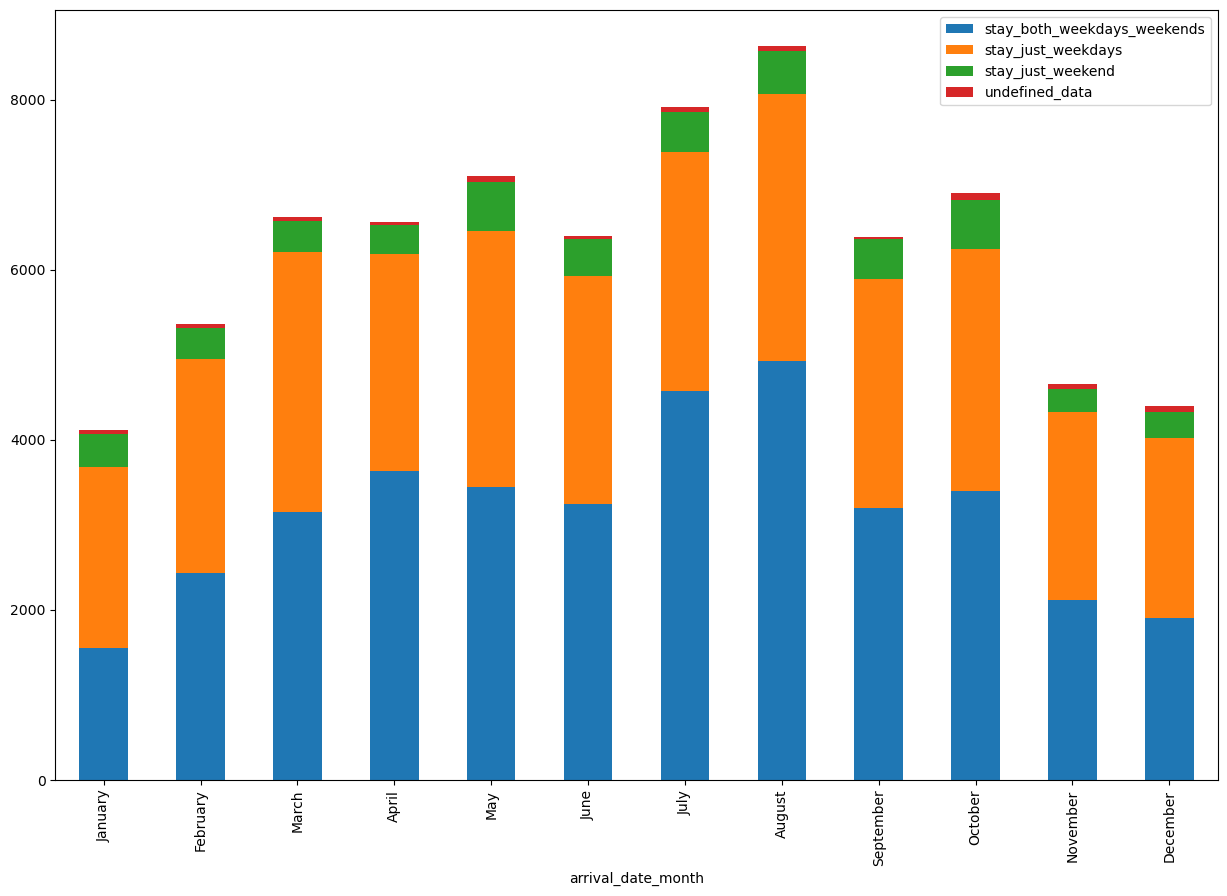

In [41]:
sorted_data.plot(kind='bar',stacked=True,figsize=(15,10))

In [42]:
new_data2.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'weekend_or_weekday'],
      dtype='object')

In [43]:
def family(row):
    if (row['adults'] > 0) & (row['children'] > 0 or row['babies'] > 0):
        return 1
    else:
        return 0


In [44]:
new_data['is_family']=new_data.apply(family, axis=1)

In [45]:
new_data['total_customer'] = new_data['adults'] + new_data['babies'] + new_data['children']

In [46]:
new_data['total_nights'] = new_data['stays_in_week_nights'] + new_data['stays_in_weekend_nights']

In [47]:
new_data.head(3)

hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        109               2016            January   
1  Resort Hotel            0        109               2016            January   
2  Resort Hotel            1          2               2016            January   

   arrival_date_week_number  arrival_date_day_of_month  \
0                         1                          1   
1                         1                          1   
2                         1                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  ...  \
0                        0                     1       2  ...   
1                        0                     1       2  ...   
2                        0                     1       2  ...   

   days_in_waiting_list    customer_type     adr required_car_parking_spaces  \
0                     0  Transient-Party   59.94                           0   
1                     0  Transient-Party  116.10                           1   
2                     0        Transient   89.00                           0   

  total_of_special_requests reservation_status  reservation_status_date  \
0                         1          Check-Out                 1/2/2016   
1                         1          Check-Out                 1/2/2016   
2                         1            No-Show                 1/1/2016   

   is_family  total_customer total_nights  
0          0             2.0            1  
1          1             4.0            1  
2          0             2.0            1  

[3 rows x 33 columns]

In [48]:
new_data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'is_family',
       'total_customer', 'total_nights'],
      dtype='object')

In [49]:
new_data['deposit_type'].unique()

array(['No Deposit', 'Non Refund', 'Refundable'], dtype=object)

In [50]:
dict1={'No Deposit':0, 'Non Refund': 1, 'Refundable': 0}

In [51]:
new_data['deposit_type'].map(dict1)

0         0
1         0
2         0
3         0
4         0
         ..
119205    0
119206    0
119207    0
119208    0
119209    0
Name: deposit_type, Length: 119210, dtype: int64

In [52]:
new_data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'is_family',
       'total_customer', 'total_nights'],
      dtype='object')

In [53]:
new_data.drop(columns=['adults', 'children', 'babies', 'deposit_type'], axis=1, inplace=True)

In [54]:
new_data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'meal', 'country', 'market_segment',
       'distribution_channel', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'days_in_waiting_list',
       'customer_type', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests', 'reservation_status',
       'reservation_status_date', 'is_family', 'total_customer',
       'total_nights'],
      dtype='object')

In [55]:
new_data.head(6)

hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        109               2016            January   
1  Resort Hotel            0        109               2016            January   
2  Resort Hotel            1          2               2016            January   
3  Resort Hotel            0         88               2016            January   
4  Resort Hotel            1         20               2016            January   
5  Resort Hotel            1         76               2016            January   

   arrival_date_week_number  arrival_date_day_of_month  \
0                         1                          1   
1                         1                          1   
2                         1                          1   
3                         1                          1   
4                         1                          1   
5                         1                          1   

   stays_in_weekend_nights  stays_in_week_nights meal  ...  \
0                        0                     1   BB  ...   
1                        0                     1   BB  ...   
2                        0                     1   BB  ...   
3                        0                     2   HB  ...   
4                        0                     2   BB  ...   
5                        1                     2   BB  ...   

  days_in_waiting_list    customer_type     adr  required_car_parking_spaces  \
0                    0  Transient-Party   59.94                            0   
1                    0  Transient-Party  116.10                            1   
2                    0        Transient   89.00                            0   
3                    0        Transient   73.46                            0   
4                    0        Transient  119.00                            0   
5                    0        Transient   57.90                            0   

   total_of_special_requests  reservation_status reservation_status_date  \
0                          1           Check-Out                1/2/2016   
1                          1           Check-Out                1/2/2016   
2                          1             No-Show                1/1/2016   
3                          2           Check-Out                1/3/2016   
4                          0            Canceled              12/22/2015   
5                          1            Canceled              12/20/2015   

  is_family  total_customer  total_nights  
0         0             2.0             1  
1         1             4.0             1  
2         0             2.0             1  
3         0             2.0             2  
4         1             4.0             2  
5         0             2.0             3  

[6 rows x 29 columns]

In [56]:
new_data.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
days_in_waiting_list                int64
customer_type                      object
adr                               float64
required_car_parking_spaces         int64
total_of_special_requests         

In [57]:
new_data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'meal', 'country', 'market_segment',
       'distribution_channel', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'days_in_waiting_list',
       'customer_type', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests', 'reservation_status',
       'reservation_status_date', 'is_family', 'total_customer',
       'total_nights'],
      dtype='object')

In [58]:
cate_features = [col for col in new_data.columns if new_data[col].dtype=='object']
num_features = [col for col in new_data.columns if new_data[col].dtype!='object']

In [59]:
num_features

['is_canceled',
 'lead_time',
 'arrival_date_year',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'booking_changes',
 'days_in_waiting_list',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests',
 'is_family',
 'total_customer',
 'total_nights']

In [60]:
cate_features

['hotel',
 'arrival_date_month',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'reserved_room_type',
 'assigned_room_type',
 'customer_type',
 'reservation_status',
 'reservation_status_date']

In [61]:
new_data[cate_features]

hotel arrival_date_month meal country market_segment  \
0       Resort Hotel            January   BB     RUS      Online TA   
1       Resort Hotel            January   BB     RUS      Online TA   
2       Resort Hotel            January   BB     PRT      Online TA   
3       Resort Hotel            January   HB     ARG      Online TA   
4       Resort Hotel            January   BB     PRT      Online TA   
...              ...                ...  ...     ...            ...   
119205    City Hotel           December   BB     BRA         Direct   
119206    City Hotel           December   SC     FRA      Online TA   
119207    City Hotel           December   BB     FRA  Offline TA/TO   
119208    City Hotel           December   SC     DEU      Online TA   
119209    City Hotel           December   SC     DEU      Online TA   

       distribution_channel reserved_room_type assigned_room_type  \
0                     TA/TO                  A                  D   
1                     TA/TO                  H                  H   
2                     TA/TO                  D                  D   
3                     TA/TO                  A                  D   
4                     TA/TO                  G                  G   
...                     ...                ...                ...   
119205               Direct                  E                  F   
119206                TA/TO                  A                  A   
119207                TA/TO                  A                  B   
119208                TA/TO                  A                  A   
119209                TA/TO                  A                  A   

          customer_type reservation_status reservation_status_date  
0       Transient-Party          Check-Out                1/2/2016  
1       Transient-Party          Check-Out                1/2/2016  
2             Transient            No-Show                1/1/2016  
3             Transient          Check-Out                1/3/2016  
4             Transient           Canceled              12/22/2015  
...                 ...                ...                     ...  
119205        Transient          Check-Out                1/6/2017  
119206        Transient          Check-Out                1/6/2017  
119207        Transient          Check-Out                1/7/2017  
119208  Transient-Party          Check-Out                1/8/2017  
119209  Transient-Party          Check-Out                1/8/2017  

[119210 rows x 11 columns]

In [62]:
data_cate = new_data[cate_features]

In [63]:
new_data.groupby(['hotel'])['is_canceled'].mean().to_dict()

{'City Hotel': 0.4178593534858457, 'Resort Hotel': 0.27767373336329815}

In [64]:
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [65]:
data_cate['cancellation']=new_data['is_canceled']

In [66]:
data_cate.head()

hotel arrival_date_month meal country market_segment  \
0  Resort Hotel            January   BB     RUS      Online TA   
1  Resort Hotel            January   BB     RUS      Online TA   
2  Resort Hotel            January   BB     PRT      Online TA   
3  Resort Hotel            January   HB     ARG      Online TA   
4  Resort Hotel            January   BB     PRT      Online TA   

  distribution_channel reserved_room_type assigned_room_type    customer_type  \
0                TA/TO                  A                  D  Transient-Party   
1                TA/TO                  H                  H  Transient-Party   
2                TA/TO                  D                  D        Transient   
3                TA/TO                  A                  D        Transient   
4                TA/TO                  G                  G        Transient   

  reservation_status reservation_status_date  cancellation  
0          Check-Out                1/2/2016             0  
1          Check-Out                1/2/2016             0  
2            No-Show                1/1/2016             1  
3          Check-Out                1/3/2016             0  
4           Canceled              12/22/2015             1

In [67]:
cols=data_cate.columns

In [68]:
cols = cols[0:-1]

In [69]:
cols

Index(['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'assigned_room_type',
       'customer_type', 'reservation_status', 'reservation_status_date'],
      dtype='object')

In [70]:
for col in cols:
    dict2=data_cate.groupby([col])['cancellation'].mean().to_dict()
    data_cate[col]=data_cate[col].map(dict2)

In [71]:
data_cate.head(3)

hotel  arrival_date_month      meal   country  market_segment  \
0  0.277674            0.305016  0.374106  0.379365         0.36759   
1  0.277674            0.305016  0.374106  0.379365         0.36759   
2  0.277674            0.305016  0.374106  0.562958         0.36759   

   distribution_channel  reserved_room_type  assigned_room_type  \
0              0.410598            0.391567            0.251373   
1              0.410598            0.407654            0.352528   
2              0.410598            0.318108            0.251373   

   customer_type  reservation_status  reservation_status_date  cancellation  
0       0.254504                 0.0                 0.048276             0  
1       0.254504                 0.0                 0.048276             0  
2       0.407864                 1.0                 0.101010             1

In [72]:
new_data[num_features]

is_canceled  lead_time  arrival_date_year  arrival_date_week_number  \
0                 0        109               2016                         1   
1                 0        109               2016                         1   
2                 1          2               2016                         1   
3                 0         88               2016                         1   
4                 1         20               2016                         1   
...             ...        ...                ...                       ...   
119205            0        173               2016                        53   
119206            0         17               2016                        53   
119207            0        107               2016                        53   
119208            0        310               2016                        53   
119209            0        310               2016                        53   

        arrival_date_day_of_month  stays_in_weekend_nights  \
0                               1                        0   
1                               1                        0   
2                               1                        0   
3                               1                        0   
4                               1                        0   
...                           ...                      ...   
119205                         26                        3   
119206                         30                        2   
119207                         31                        2   
119208                         27                        2   
119209                         27                        2   

        stays_in_week_nights  is_repeated_guest  previous_cancellations  \
0                          1                  0                       0   
1                          1                  0                       0   
2                          1                  0                       0   
3                          2                  0                       0   
4                          2                  0                       0   
...                      ...                ...                     ...   
119205                     8                  0                       0   
119206                     5                  0                       0   
119207                     5                  0                       0   
119208                    10                  0                       0   
119209                    10                  0                       0   

        previous_bookings_not_canceled  booking_changes  days_in_waiting_list  \
0                                    0                0                     0   
1                                    0                0                     0   
2                                    0                0                     0   
3                                    0                0                     0   
4                                    0                0                     0   
...                                ...              ...                   ...   
119205                               0                4                     0   
119206                               0                0                     0   
119207                               0                0                     0   
119208                               0                2                     0   
119209                               0                2                     0   

           adr  required_car_parking_spaces  total_of_special_requests  \
0        59.94                            0                          1   
1       116.10                            1                          1   
2        89.00                            0                          1   
3        73.46                            0                          2   
4       119.00                            0                          0

In [73]:
dataframe=pa.concat([data_cate,new_data[num_features]], axis=1)

In [74]:
dataframe.columns

Index(['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'assigned_room_type',
       'customer_type', 'reservation_status', 'reservation_status_date',
       'cancellation', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'is_repeated_guest',
       'previous_cancellations', 'previous_bookings_not_canceled',
       'booking_changes', 'days_in_waiting_list', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests', 'is_family',
       'total_customer', 'total_nights'],
      dtype='object')

In [75]:
dataframe.drop(['cancellation'], axis=1, inplace=True)

In [76]:
dataframe.head(3)

hotel  arrival_date_month      meal   country  market_segment  \
0  0.277674            0.305016  0.374106  0.379365         0.36759   
1  0.277674            0.305016  0.374106  0.379365         0.36759   
2  0.277674            0.305016  0.374106  0.562958         0.36759   

   distribution_channel  reserved_room_type  assigned_room_type  \
0              0.410598            0.391567            0.251373   
1              0.410598            0.407654            0.352528   
2              0.410598            0.318108            0.251373   

   customer_type  reservation_status  ...  previous_cancellations  \
0       0.254504                 0.0  ...                       0   
1       0.254504                 0.0  ...                       0   
2       0.407864                 1.0  ...                       0   

   previous_bookings_not_canceled  booking_changes  days_in_waiting_list  \
0                               0                0                     0   
1                               0                0                     0   
2                               0                0                     0   

      adr  required_car_parking_spaces  total_of_special_requests  is_family  \
0   59.94                            0                          1          0   
1  116.10                            1                          1          1   
2   89.00                            0                          1          0   

   total_customer  total_nights  
0             2.0             1  
1             4.0             1  
2             2.0             1  

[3 rows x 29 columns]

<Axes: xlabel='lead_time', ylabel='Density'>

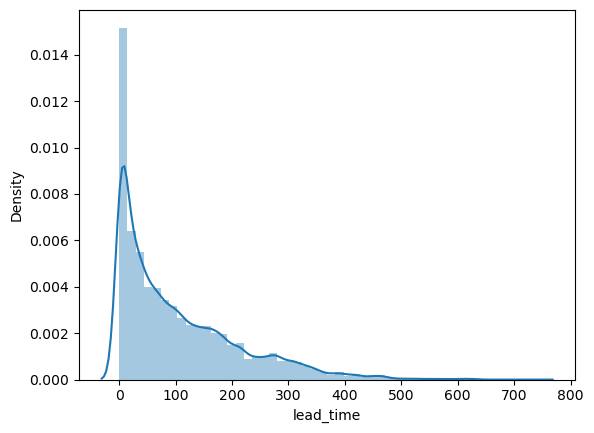

In [77]:
se.distplot(dataframe['lead_time'])

In [78]:
def handle_outlier(col):
    dataframe[col]=nu.log1p(dataframe[col])

In [79]:
handle_outlier('lead_time')

<Axes: xlabel='lead_time', ylabel='Density'>

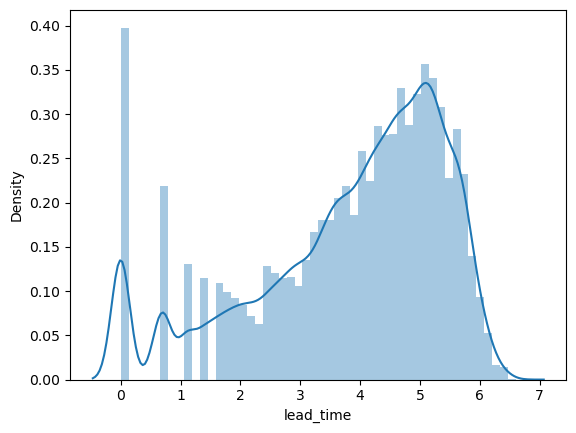

In [80]:
se.distplot(dataframe['lead_time'])

In [81]:
## adr

<Axes: xlabel='adr', ylabel='Density'>

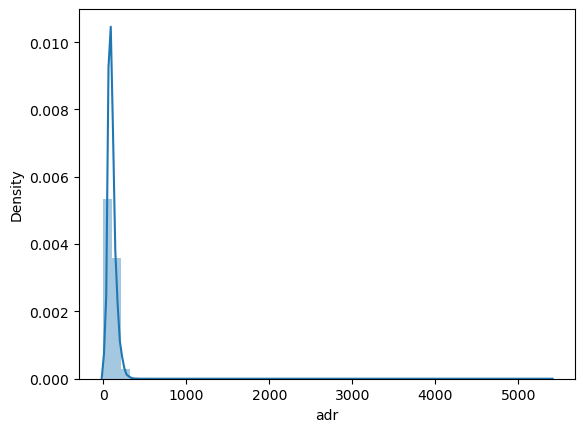

In [82]:
se.distplot(dataframe['adr'])

In [83]:
dataframe[dataframe['adr']<0]

hotel  arrival_date_month      meal  country  market_segment  \
14989  0.277674            0.322277  0.374106  0.20231        0.611086   

       distribution_channel  reserved_room_type  assigned_room_type  \
14989              0.174868            0.391567            0.352528   

       customer_type  reservation_status  ...  previous_cancellations  \
14989       0.254504                 0.0  ...                       0   

       previous_bookings_not_canceled  booking_changes  days_in_waiting_list  \
14989                               2                2                     0   

        adr  required_car_parking_spaces  total_of_special_requests  \
14989 -6.38                            0                          0   

       is_family  total_customer  total_nights  
14989          0             2.0            10  

[1 rows x 29 columns]

In [84]:
handle_outlier('adr')

In [85]:
dataframe['adr'].isnull().sum()

1

<Axes: xlabel='adr', ylabel='Density'>

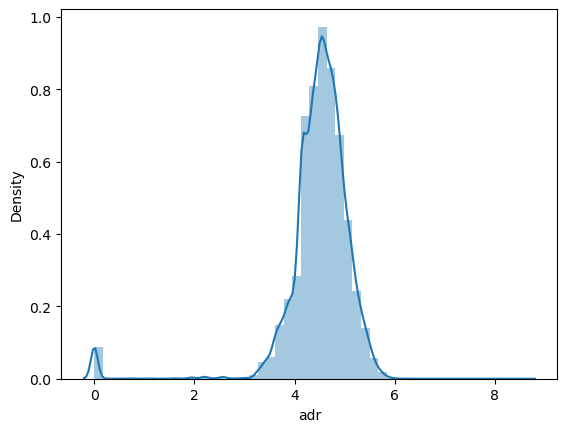

In [86]:
se.distplot(dataframe['adr'].dropna())

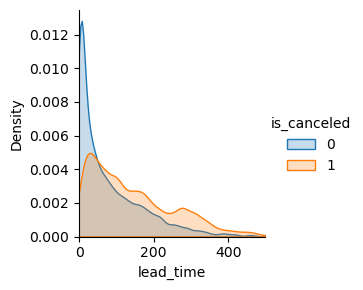

In [87]:
se.FacetGrid(new_data, hue='is_canceled', xlim=(0,500)).map(se.kdeplot,'lead_time', shade=True).add_legend()

In [88]:
corr=dataframe.corr()

In [89]:
corr['is_canceled'].sort_values(ascending=False)

reservation_status                1.000000
is_canceled                       1.000000
reservation_status_date           0.488307
country                           0.357232
lead_time                         0.320075
market_segment                    0.267006
assigned_room_type                0.201570
distribution_channel              0.177167
hotel                             0.137082
customer_type                     0.136617
previous_cancellations            0.110139
adr                               0.081660
reserved_room_type                0.072769
arrival_date_month                0.069886
days_in_waiting_list              0.054301
meal                              0.050584
total_customer                    0.044826
stays_in_week_nights              0.025542
total_nights                      0.018554
arrival_date_year                 0.016622
arrival_date_week_number          0.008315
stays_in_weekend_nights          -0.001323
arrival_date_day_of_month        -0.005948
is_family  

In [90]:
corr['is_canceled'].sort_values(ascending=False).index

Index(['reservation_status', 'is_canceled', 'reservation_status_date',
       'country', 'lead_time', 'market_segment', 'assigned_room_type',
       'distribution_channel', 'hotel', 'customer_type',
       'previous_cancellations', 'adr', 'reserved_room_type',
       'arrival_date_month', 'days_in_waiting_list', 'meal', 'total_customer',
       'stays_in_week_nights', 'total_nights', 'arrival_date_year',
       'arrival_date_week_number', 'stays_in_weekend_nights',
       'arrival_date_day_of_month', 'is_family',
       'previous_bookings_not_canceled', 'is_repeated_guest',
       'booking_changes', 'required_car_parking_spaces',
       'total_of_special_requests'],
      dtype='object')

In [91]:
features_to_drop=['reservation_status', 'reservation_status_date', 'arrival_date_year', 'arrival_date_week_number', 'stays_in_weekend_nights', 'arrival_date_day_of_month']

In [92]:
dataframe.drop(features_to_drop,axis=1,inplace=True)

In [93]:
dataframe.shape

(119210, 23)

In [94]:
dataframe.head(2)

hotel  arrival_date_month      meal   country  market_segment  \
0  0.277674            0.305016  0.374106  0.379365         0.36759   
1  0.277674            0.305016  0.374106  0.379365         0.36759   

   distribution_channel  reserved_room_type  assigned_room_type  \
0              0.410598            0.391567            0.251373   
1              0.410598            0.407654            0.352528   

   customer_type  is_canceled  ...  previous_cancellations  \
0       0.254504            0  ...                       0   
1       0.254504            0  ...                       0   

   previous_bookings_not_canceled  booking_changes  days_in_waiting_list  \
0                               0                0                     0   
1                               0                0                     0   

        adr  required_car_parking_spaces  total_of_special_requests  \
0  4.109890                            0                          1   
1  4.763028                            1                          1   

   is_family  total_customer  total_nights  
0          0             2.0             1  
1          1             4.0             1  

[2 rows x 23 columns]

In [95]:
dataframe.dropna(inplace=True)
x=dataframe.drop('is_canceled', axis=1)

In [96]:
y=dataframe['is_canceled']

In [97]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [98]:
feature_sel_model=SelectFromModel(Lasso(alpha=0.005))

In [99]:
feature_sel_model.fit(x, y)

SelectFromModel(estimator=Lasso(alpha=0.005))

In [100]:
feature_sel_model.get_support()

array([False, False, False,  True,  True, False, False, False,  True,
        True, False, False,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True])

In [101]:
cols=x.columns

In [102]:
selected_feature=cols[feature_sel_model.get_support()]

In [103]:
selected_feature

Index(['country', 'market_segment', 'customer_type', 'lead_time',
       'previous_cancellations', 'previous_bookings_not_canceled',
       'booking_changes', 'days_in_waiting_list', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'total_customer', 'total_nights'],
      dtype='object')

In [104]:
x=x[selected_feature]

In [105]:
y

0         0
1         0
2         1
3         0
4         1
         ..
119205    0
119206    0
119207    0
119208    0
119209    0
Name: is_canceled, Length: 119209, dtype: int64

In [106]:
from sklearn.model_selection import train_test_split

In [107]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

In [108]:
x_train.shape

(89406, 13)

In [109]:
from sklearn.linear_model import LogisticRegression

In [110]:
logreg=LogisticRegression()

In [111]:
logreg.fit(x_train, y_train)

LogisticRegression()

In [112]:
pred=logreg.predict(x_test)

In [113]:
pred

array([0, 1, 0, ..., 0, 0, 0])

In [114]:
from sklearn.metrics import confusion_matrix

In [115]:
confusion_matrix(y_test, pred)

array([[16780,  1944],
       [ 3784,  7295]])

In [116]:
from sklearn.metrics import accuracy_score

In [117]:
accuracy_score(y_test, pred)

0.8078045834311982

In [118]:
from sklearn.model_selection import cross_val_score

In [119]:
score=cross_val_score(logreg,x,y,cv=10)

In [120]:
score

array([0.78961497, 0.79624193, 0.80756648, 0.82526634, 0.81645835,
       0.74339401, 0.75815787, 0.85655566, 0.83877192, 0.80377517])

In [121]:
score.mean()

0.8035802682255497

In [122]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [124]:
models=[]

models.append(('LogisiticRegression', LogisticRegression()))
models.append(('Naive bayes', GaussianNB()))
models.append(('RandomForest', RandomForestClassifier()))
models.append(('Decision Tree', DecisionTreeClassifier()))
models.append(('KNN', KNeighborsClassifier()))

In [127]:
for name, model in models:
    print(name)
    model.fit(x_train, y_train)
    
    predictions=model.predict(x_test)
    
    from sklearn.metrics import confusion_matrix
    print(confusion_matrix(predictions, y_test))
    print('\n')
    
    print(accuracy_score(predictions, y_test))
    print('\n')

LogisiticRegression
[[16780  3784]
 [ 1944  7295]]


0.8078045834311982


Naive bayes
[[ 4173   287]
 [14551 10792]]


0.5021306579874509


RandomForest
[[17149  2241]
 [ 1575  8838]]


0.871959198738382


Decision Tree
[[16216  2293]
 [ 2508  8786]]


0.8389088346810724


KNN
[[16598  3004]
 [ 2126  8075]]


0.82786967754924


